<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'>
<ul>We are using the same dataset as the previous laboratory exercise, now you need to build Neural networks</ul>

<li>Build three different networks with using:</li>
different layers, activation functions, neurans per layers, number of layers
<li>train your network and set the optimal number of epochs and batch size</li>
<li>Evaluate the three networks on the same test dataset</li>
<li>Compare the results</li>
</ul>

The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [ ]:
df = pd.read_csv('/content/train.csv')


In [ ]:
df


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [ ]:
df.describe()


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


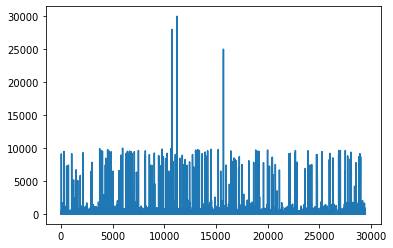

In [ ]:
df['TARGET(PRICE_IN_LACS)'].plot()


In [ ]:
df.drop(['LONGITUDE', 'LATITUDE', 'ADDRESS'], axis=1, inplace=True)


In [ ]:
df.isna().sum()


POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [ ]:
drop_columns = ['LONGITUDE', 'LATITUDE', 'ADDRESS']
label_columns = ['BHK_OR_RK', 'POSTED_BY']


In [ ]:
label_encoder = LabelEncoder()

df.drop(drop_columns, axis=1, inplace=True, errors='ignore')

for column in label_columns:
  df[column] = label_encoder.fit_transform(df[column].to_numpy().reshape(-1))


In [ ]:
x = df.drop('TARGET(PRICE_IN_LACS)', axis=1)
y = df['TARGET(PRICE_IN_LACS)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
models = [Sequential(), Sequential(), Sequential()]


In [ ]:
models[0] = Sequential()

models[0].add(Dense(16, activation='relu'))
models[0].add(Dense(256, activation='relu'))
models[0].add(Dense(128, activation='relu'))
models[0].add(Dense(64, activation='relu'))
models[0].add(Dense(1, activation='linear'))

models[0].compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [ ]:
models[1] = Sequential()

models[1].add(Dense(8, activation='relu'))
models[1].add(Dense(128, activation='relu'))
models[1].add(Dense(64, activation='relu'))
models[1].add(Dense(32, activation='relu'))
models[1].add(Dense(1, activation='linear'))

models[1].compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [ ]:
models[2] = Sequential()

models[2].add(Dense(16, activation='relu'))
models[2].add(Dense(256, activation='relu'))
models[2].add(Dropout(0.25))
models[2].add(Dense(128, activation='relu'))
models[2].add(Dense(64, activation='relu'))
models[2].add(Dropout(0.25))
models[2].add(Dense(1, activation='linear'))

models[2].compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [ ]:
scores = []
errors = []

for i, model in enumerate(models):
  model.fit(x_train, y_train, epochs=50)
  y_pred = model.predict(x_test)

  scores.append(r2_score(y_test, y_pred))
  errors.append(mean_absolute_error(y_test, y_pred))


Epoch 1/50
737/737 [==============================] - 1s 2ms/step - loss: 60325.2148 - accuracy: 4.2445e-05
Epoch 2/50
737/737 [==============================] - 1s 2ms/step - loss: 65256.7461 - accuracy: 4.2445e-05
Epoch 3/50
737/737 [==============================] - 1s 2ms/step - loss: 53273.8555 - accuracy: 4.2445e-05
Epoch 4/50
737/737 [==============================] - 1s 2ms/step - loss: 58497.5938 - accuracy: 4.2445e-05
Epoch 5/50
737/737 [==============================] - 1s 2ms/step - loss: 66231.9141 - accuracy: 4.2445e-05
Epoch 6/50
737/737 [==============================] - 1s 2ms/step - loss: 51710.9023 - accuracy: 4.2445e-05
Epoch 7/50
737/737 [==============================] - 1s 2ms/step - loss: 65110.5039 - accuracy: 4.2445e-05
Epoch 8/50
737/737 [==============================] - 1s 2ms/step - loss: 52889.7578 - accuracy: 4.2445e-05
Epoch 9/50
737/737 [==============================] - 1s 2ms/step - loss: 57114.1445 - accuracy: 4.2445e-05
Epoch 10/50
737/737 [=======

In [ ]:
for i in range(len(models)):
  print(f'model {i} r2 score: {scores[i]}')
  print(f'model {i} mean absolute error: {errors[i]}')
  print()


model 0 r2 score: 0.8468015602860862
model 0 mean absolute error: 63.9722561994147

model 1 r2 score: 0.04933321295509874
model 1 mean absolute error: 109.95457691928888

model 2 r2 score: 0.8563828720144817
model 2 mean absolute error: 67.53417150259463



Model 0 and 2 are good, while model 1 is underperforming severely. Model 3 is the most accurate model.